In [1]:
%matplotlib inline

The tutorial part is based on the scikit-learn [tutorial](https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [3]:
# Create a mixture of two Gaussians
np.random.seed(1242314)
N = 2000
first_mode = norm(0, 1)
second_mode = norm(5, 2)
data = np.concatenate([first_mode.rvs(N), second_mode.rvs(N)]).reshape(-1, 1)

Bandwidth 0.1; test dataset log-likelihood -2.83e+04


Bandwidth 1; test dataset log-likelihood -4.52e+03


Bandwidth 3; test dataset log-likelihood -3.45e+03


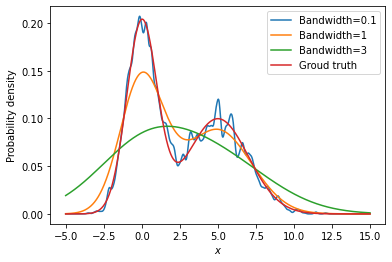

In [4]:
# Plot the probability densities for different values of bandwidth
fig, ax = plt.subplots()
x = np.linspace(-5, 15, num=1000).reshape(-1, 1)
for bandwidth in (0.1, 1, 3):
    estimator = KernelDensity(bandwidth=bandwidth).fit(data)
    predictions = estimator.score_samples(x)
    print(f"Bandwidth {bandwidth}; test dataset log-likelihood {predictions.sum():.3}")
    # Predictions are log(p(x))
    probabilities = np.exp(predictions)
    ax.plot(x, probabilities, label=f"Bandwidth={bandwidth}")
ax.plot(x, 0.5*(first_mode.pdf(x.flatten()) + second_mode.pdf(x.flatten())), label="Groud truth")
ax.set_xlabel("$x$")
ax.set_ylabel("Probability density")
ax.legend();

In [5]:
# Use grid search and cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=4, n_jobs=2)
grid.fit(data)
optimal_kde = grid.best_estimator_

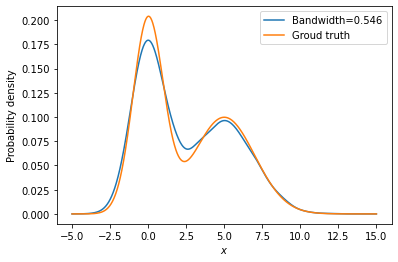

In [6]:
# Plot the optimal estimator
fig, ax = plt.subplots()
probabilities = np.exp(optimal_kde.score_samples(x))
ax.plot(x, probabilities, label=f"Bandwidth={optimal_kde.get_params()['bandwidth']:.3f}")
ax.plot(x, 0.5*(first_mode.pdf(x.flatten()) + second_mode.pdf(x.flatten())), label="Groud truth")
ax.set_xlabel("$x$")
ax.set_ylabel("Probability density")
ax.legend();

In [7]:
# Load the digits data. It's almost like MNIST -- but a lot simplier for the simplier model
digits = load_digits()

# Project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

best bandwidth: 3.79269019073225


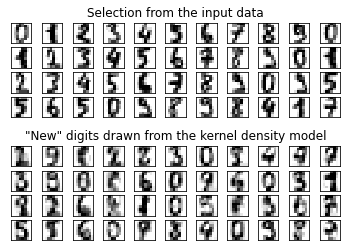

In [8]:
# Use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)
optimal_kde = grid.best_estimator_

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# Use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# Sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# Turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# Plot the real digits and the sampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

## Task 1
Plot the optimal bandwidth for the combination of two Gaussians as a function of the training dataset size for training dataset size in `np.linspace(10, 5000, num=10)`. Use `generate_sample` for generating the training data. Given that it is possible to generate an infinite amount of data, it is possible to find the answer with arbitrary precision. For the purpose of this task it is enough to evaluate the performance with bandwidth in ` np.logspace(-1, 1, 20)` on 4-fold cross-validation.

In [0]:
first_mode = norm(0, 1)
second_mode = norm(5, 2)
def generate_sample(sample_size:int):
    """
    Produces a toy dataset
    Args:
        sample_size:int -- the desired sample size
    Returns:
        np.array(sample_size, 1) -- a toy dataset with single feature and sample_size examples
    """
    half_size = sample_size // 2
    # In case of an uneven sample size
    second_half_size = sample_size - half_size
    return np.concatenate([first_mode.rvs(half_size), second_mode.rvs(second_half_size)]).reshape(-1, 1)

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 2
Use your creativity, physical intuition, knowledge of statistics and ability to read the [KernelDensity documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) to find the  optimal kernel density parameters for training dataset size=134. Use `generate_sample` for generating as much training and testing data as you desire. Note: 134 is a low number, so make sure your solution is not overfitted to a single training sample. The goal is to have the mean log-likelihood on the test sample < -2.35

In [0]:
# optimal_params = <your params>
# E.g. optimal_params = {"bandwidth": 2., "kernel": "epanechnikov"}

There are many cells below due to the structure of our solution and testing. You can use any number of them.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

In [0]:
%%time
# YOUR CODE HERE
raise NotImplementedError()

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

In [0]:
# evaluate_params is a function, which is implemented in the solutions. It's not available, as it would make the task too easy
score = evaluate_params(optimal_params, n_trials=1000)[0]
assert score < -2.35